# Import sales data & merging

In [1]:
import pandas as pd
import os, glob

In [2]:
os.chdir(r"C:\Users\annie\OneDrive\Python projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")

In [3]:
#Concatenate all 12 months of sales into one csv file
path = (r"C:\Users\annie\OneDrive\Python projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")
all_file = glob.glob(os.path.join(path,"Sales_*.csv"))
months_sales = (pd.read_csv(f, sep=',') for f in all_file)
months_sales = pd.concat(months_sales, ignore_index=True)
months_sales.to_csv("all_data_sales.csv")

In [4]:
# DataFrame with 12 months worth of sales
all_data = pd.read_csv("all_data_sales.csv", index_col=0)

# Data cleaning

In [5]:
#Select NAN columns
nan_df = all_data[all_data.columns[all_data.isna().any()]]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
#Drop rows with NAN 
all_data = all_data.dropna() 
print(all_data)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

In [7]:
all_data.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [8]:
#Find "Or" or delete it : Find duplicates
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [9]:
#Convert columns to Int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Organize

#### Add month column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Calculate Sales 

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Create City column

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] #splits the state with the city by splittting on white spaces

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Create Order Date time distribution

In [13]:
# Convert order date into a date time object with Date time library 
# Converting to date time makes it easier to parse data into various columns
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [14]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] =  all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


# Analysis

### 1. What was the best month for sales? How much was earned that month

In [15]:
pd.set_option('float_format', '{:f}'.format)
total = all_data.groupby('Month').sum()

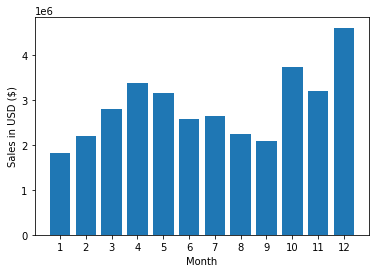

In [16]:
#Let's look at the trend month to month
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,total['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")
plt.show()


### 2. What city had the highest number of sales?

In [17]:
best_city = all_data.groupby('City').sum()
print(best_city)

                     Quantity Ordered     Price Each   Month          Sales  \
City                                                                          
 Atlanta (GA)                   16602 2779908.200000  104794 2795498.580000   
 Austin (TX)                    11153 1809873.610000   69829 1819581.750000   
 Boston (MA)                    22528 3637409.770001  141112 3661642.010001   
 Dallas (TX)                    16730 2752627.820000  104620 2767975.400000   
 Los Angeles (CA)               33289 5421435.230002  208325 5452570.800002   
 New York City (NY)             27932 4635370.830002  175741 4664317.430002   
 Portland (ME)                   2750  447189.250000   17144  449758.270000   
 Portland (OR)                  11303 1860558.220000   70621 1870732.340000   
 San Francisco (CA)             50239 8211461.740004  315520 8262203.910004   
 Seattle (WA)                   16553 2733296.010000  104941 2747755.480000   

                       Hour   Minute  
City        

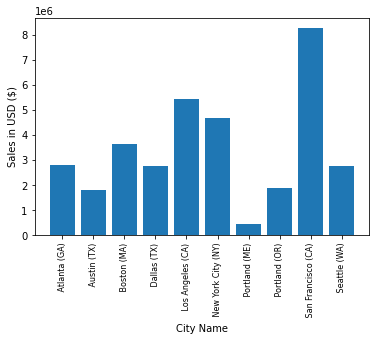

In [18]:
#Let's look at the trend month to month
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')] #order matters

plt.bar(cities,best_city['Sales'])
plt.xticks(cities, rotation ='vertical', size =8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

### 3. What time should we display advertisements to maximize likelihoof of customer's buying products?

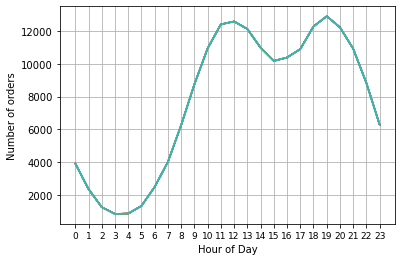

In [19]:
hours = [hour for hour, df in all_data.groupby('Hour')] #order matters

plt.plot(hours, all_data.groupby(['Hour']).count()) # number of
plt.xticks(hours, size=9)
plt.grid()
plt.ylabel("Number of orders")
plt.xlabel("Hour of Day")
plt.show()


# Best time to advertize is betwwen the hours of 10AM -7PM


### 4. What products are most often sold together?


In [20]:
dupes = all_data[all_data['Order ID'].duplicated(keep=False)] #find duplicates in Order_Id Column

# Groupd duplicates of Order ID rows by product column then joins products by comma and shows occurences of same pairs
dupes['Grouped'] = dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 

#drops duplicated rows in dupes dataframe
dupes = dupes[['Order ID', 'Grouped']].drop_duplicates()



<ipython-input-20-11e832ef2209>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupes['Grouped'] = dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [22]:
# Count pairs of products most often sold together

from itertools import combinations 
from collections import Counter

count = Counter()

for row in dupes['Grouped']:
    dupes_sublist = row.split(',')
    count.update(Counter(combinations(dupes_sublist,2)))  # counts the combinations of most 2 items bought togther returns in dictionnary
    
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What products sold the most and why?

In [62]:
#Returns most bought item
all_data.Product.mode()

0    USB-C Charging Cable
dtype: object

In [63]:
#Returns the count of the each product sold
product_count = all_data.value_counts(all_data['Product'])
product_count

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
dtype: int64

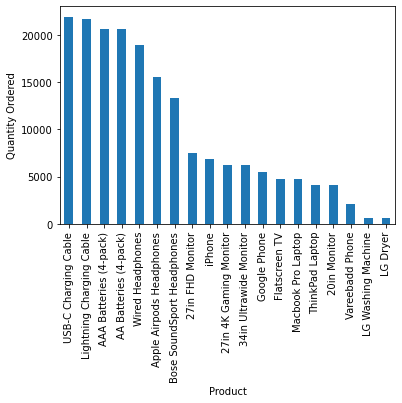

In [41]:
#Let's graph it
product_count.plot.bar()
plt.ylabel("Quantity Ordered")
plt.show()


In [64]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                  109.990000
27in 4K Gaming Monitor        389.990000
27in FHD Monitor              149.990000
34in Ultrawide Monitor        379.990000
AA Batteries (4-pack)           3.840000
AAA Batteries (4-pack)          2.990000
Apple Airpods Headphones      150.000000
Bose SoundSport Headphones     99.990000
Flatscreen TV                 300.000000
Google Phone                  600.000000
LG Dryer                      600.000000
LG Washing Machine            600.000000
Lightning Charging Cable       14.950000
Macbook Pro Laptop           1700.000000
ThinkPad Laptop               999.990000
USB-C Charging Cable           11.950000
Vareebadd Phone               400.000000
Wired Headphones               11.990000
iPhone                        700.000000
Name: Price Each, dtype: float64